In [11]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
df =sm.datasets.fair.load_pandas().data

In [ ]:
Description of Variables
The dataset contains 6366 observations of 9 variables:

rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good)
age: woman's age
yrs_married: number of years married
children: number of children
religious: woman's rating of how religious she is (1 = not religious, 4 = strongly religious)
educ: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)
occupation: woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)
occupation_husb: husband's occupation (same coding as above)
affairs: time spent in extra-marital affairs

In [13]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [16]:
df['affair'] = (dta.affairs >0).astype(int)
df
# add "affair" column: 1 represents having affairs, 0 represents not

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


In [17]:
df.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs', 'affair'],
      dtype='object')

In [19]:
df.loc[df.affairs<=0].head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
2053,4.0,32.0,9.0,2.0,3.0,14.0,2.0,4.0,0.0,0
2054,4.0,27.0,6.0,0.0,2.0,14.0,3.0,4.0,0.0,0
2055,4.0,22.0,2.5,0.0,2.0,14.0,3.0,2.0,0.0,0
2056,5.0,42.0,23.0,4.0,3.0,16.0,3.0,5.0,0.0,0
2057,5.0,27.0,2.5,1.0,3.0,20.0,2.0,2.0,0.0,0


In [26]:
# Average of all features group by affair
df.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [32]:
df.groupby('rate_marriage').mean()
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


In [33]:
# data visualisation

In [34]:
# show plots in the notebook
%matplotlib inline

Text(0.5, 1.0, 'histogram of education')

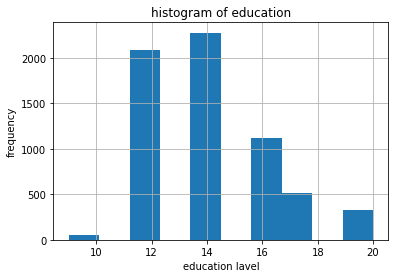

In [37]:
df.educ.hist()
plt.xlabel("education lavel")
plt.ylabel("frequency")
plt.title("histogram of education")

Text(0.5, 1.0, 'histogram of rate marriage')

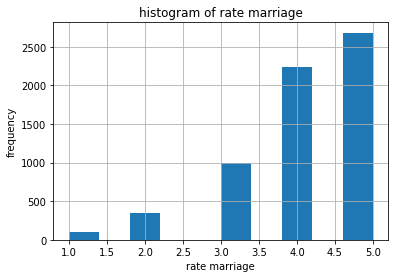

In [39]:
df.rate_marriage.hist()
plt.xlabel("rate marriage")
plt.ylabel("frequency")
plt.title("histogram of rate marriage")

In [43]:
df.rate_marriage.value_counts()

5.0    2684
4.0    2242
3.0     993
2.0     348
1.0      99
Name: rate_marriage, dtype: int64

In [44]:
Let's take a look at the distribution of marriage ratings for those having affairs versus those not having affairs.

Text(0.5, 1.0, 'marriage rating affaris by affair status')

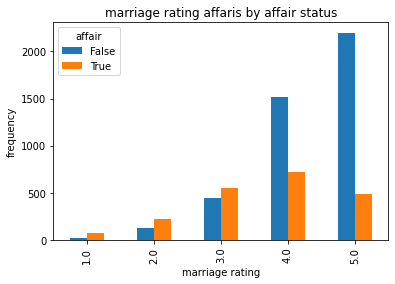

In [53]:
pd.crosstab(df.rate_marriage,df.affair.astype(bool)).plot(kind='bar')
plt.xlabel("marriage rating")
plt.ylabel("frequency")
plt.title("marriage rating affaris by affair status")

In [54]:
pd.crosstab(df.rate_marriage,df.affair.astype(bool))
# 487 people having affirs even though they have given rating as 5

affair,False,True
rate_marriage,,
1.0,25,74
2.0,127,221
3.0,446,547
4.0,1518,724
5.0,2197,487


In [58]:
df.rate_marriage.value_counts()

5.0    2684
4.0    2242
3.0     993
2.0     348
1.0      99
Name: rate_marriage, dtype: int64

In [56]:
df.affair.value_counts()

0    4313
1    2053
Name: affair, dtype: int64

In [57]:
#1 represents having affairs, 0 represents not

In [59]:
# letss see how many women have affairs after how much years

In [60]:
pd.crosstab(df.yrs_married,df.affair.astype(bool))

affair,False,True
yrs_married,,
0.5,354,16
2.5,1595,439
6.0,754,387
9.0,348,254
13.0,347,243
16.5,449,369
23.0,466,345


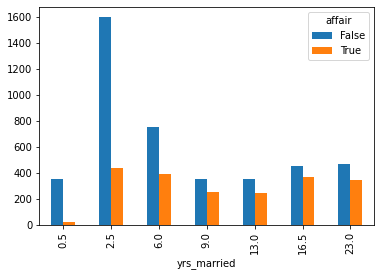

In [61]:
#Let's use a stacked barplot to look at the percentage of women having affairs by number of years of marriage.
pd.crosstab(df.yrs_married,df.affair.astype(bool)).plot(kind='bar')


Text(0, 0.5, 'Percentage')

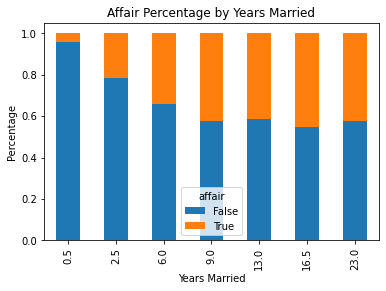

In [62]:
#Let's use a stacked barplot to look at the percentage of women having affairs by number of years of marriage.
affair_yrs_married = pd.crosstab(df.yrs_married, df.affair.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Affair Percentage by Years Married')
plt.xlabel('Years Married')
plt.ylabel('Percentage')

In [ ]:
Prepare Data for Logistic Regression
To prepare the data, I want to add an intercept column as well as dummy variables 
for occupation and occupation_husb, since I'm treating them as categorial variables. The dmatrices function from the patsy module can do that using formula language.

In [63]:
# create dataframes with an intercept column and dummy variables for occupation and occupation_husb
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
                  religious + educ + C(occupation) + C(occupation_husb)',
                  df, return_type="dataframe")
X.columns



Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')

In [ ]:
# columns names are ugly so we need to rename them

In [66]:
# fix column names of X
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(occupation_husb)[T.2.0]':'occ_husb_2',
                        'C(occupation_husb)[T.3.0]':'occ_husb_3',
                        'C(occupation_husb)[T.4.0]':'occ_husb_4',
                        'C(occupation_husb)[T.5.0]':'occ_husb_5',
                        'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [67]:
y = np.ravel(y)

In [68]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [70]:
X.columns

Index(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2',
       'occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage',
       'age', 'yrs_married', 'children', 'religious', 'educ'],
      dtype='object')

In [71]:
lr=LogisticRegression()


In [73]:
model=lr.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [76]:
model.score(X,y)

0.7262016965127238

In [77]:
# what % of women had affairs
y.mean()

0.3224945020420987

In [ ]:
Only 32% of the women had affairs, which means that you could obtain 68% accuracy by always predicting "no". So we're doing better than the null error rate, but not by much.

Let's examine the coefficients to see what we learn.

In [78]:
X.columns,np.transpose(model.coef_)

(Index(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2',
        'occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage',
        'age', 'yrs_married', 'children', 'religious', 'educ'],
       dtype='object'), array([[ 1.3922942 ],
        [ 0.07363148],
        [ 0.36510216],
        [ 0.11718915],
        [ 0.78551318],
        [ 0.24592626],
        [ 0.30493704],
        [ 0.43693708],
        [ 0.25518036],
        [ 0.27224599],
        [ 0.24836806],
        [-0.69786279],
        [-0.05540479],
        [ 0.10616937],
        [ 0.00141596],
        [-0.36105645],
        [ 0.01003666]]))

In [ ]:
Increases in marriage rating and religiousness correspond to a decrease in the likelihood of having an affair. For both, wife's occupation and the husband's occupation,
 the lowest likelihood of having an affair corresponds to the baseline occupation (student), since all of the dummy coefficients are positive.

In [ ]:
Model Evaluation Using a Validation Set

In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)


In [88]:
X_train.shape

(4456, 17)

In [89]:
y_train.shape

(4456,)

In [90]:
X_test.shape

(1910, 17)

In [91]:
y_test.shape

(1910,)

In [107]:
model3=LogisticRegression()

In [108]:
model3.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [109]:
#predition on testing data
model_test=model3.predict(X_test)
model_test

array([0., 0., 1., ..., 0., 1., 0.])

In [110]:
# prediction on traingn data
model_train=model3.predict(X_train)
model_train

array([0., 0., 1., ..., 0., 0., 0.])

In [111]:
# generate class probabilities
probs = model3.predict_proba(X_test)
probs

array([[0.7363786 , 0.2636214 ],
       [0.71136539, 0.28863461],
       [0.33222025, 0.66777975],
       ...,
       [0.89153322, 0.10846678],
       [0.40653755, 0.59346245],
       [0.89728947, 0.10271053]])

In [112]:
print(metrics.accuracy_score(y_test,model_test))

0.7141361256544503


In [113]:
print(metrics.roc_auc_score(y_test, probs[:, 1]))

0.7306100021905109


In [115]:
print(metrics.confusion_matrix(y_test,model_test))

[[1141  122]
 [ 424  223]]


In [116]:
print(metrics.classification_report(y_test,model_test))

              precision    recall  f1-score   support

         0.0       0.73      0.90      0.81      1263
         1.0       0.65      0.34      0.45       647

    accuracy                           0.71      1910
   macro avg       0.69      0.62      0.63      1910
weighted avg       0.70      0.71      0.69      1910



In [119]:
from sklearn.model_selection import cross_val_score

In [120]:
scores=cross_val_score(LogisticRegression(),X,y,scoring='accuracy',cv=10)
scores,scores.mean()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


(array([0.72684458, 0.69544741, 0.73783359, 0.70800628, 0.71428571,
        0.7299843 , 0.73113208, 0.70597484, 0.75157233, 0.75157233]),
 0.7252653456157498)

In [121]:
model3.predict_proba(np.array([[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 25, 3, 1, 4, 16]]))

array([[0.79051468, 0.20948532]])